In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.describe(include=['O'])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [7]:
sorted(df['Year'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 nan,
 2016.0,
 2017.0,
 2020.0]

In [8]:
sorted(df['Genre'].unique())

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
frequencia = df['Year'].value_counts()
percentual = df['Year'].value_counts(normalize = True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename_axis('Year', axis= 'columns', inplace = True)
dist_freq_qualitativas

Year,Frequência,Porcentagem (%)
2009.0,1431,8.764623
2008.0,1428,8.746249
2010.0,1259,7.711153
2007.0,1202,7.362038
2011.0,1139,6.976174
2006.0,1008,6.173823
2005.0,941,5.763459
2002.0,829,5.077479
2003.0,775,4.746739
2004.0,763,4.673241


In [11]:
frequencia = df['Name'].value_counts()
percentual = df['Name'].value_counts(normalize = True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename_axis('Name', axis= 'columns', inplace = True)
dist_freq_qualitativas

Name,Frequência,Porcentagem (%)
Need for Speed: Most Wanted,12,0.072298
Ratatouille,9,0.054223
FIFA 14,9,0.054223
LEGO Marvel Super Heroes,9,0.054223
Madden NFL 07,9,0.054223
...,...,...
Ar tonelico Qoga: Knell of Ar Ciel,1,0.006025
Galaga: Destination Earth,1,0.006025
Nintendo Presents: Crossword Collection,1,0.006025
TrackMania: Build to Race,1,0.006025


In [12]:
frequencia = df['Platform'].value_counts()
percentual = df['Platform'].value_counts(normalize = True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename_axis('Platform', axis= 'columns', inplace = True)
dist_freq_qualitativas

Platform,Frequência,Porcentagem (%)
DS,2163,13.031691
PS2,2161,13.019641
PS3,1329,8.006989
Wii,1325,7.982890
X360,1265,7.621400
PSP,1213,7.308109
PS,1196,7.205687
PC,960,5.783829
XB,824,4.964454
GBA,822,4.952404


<AxesSubplot:>

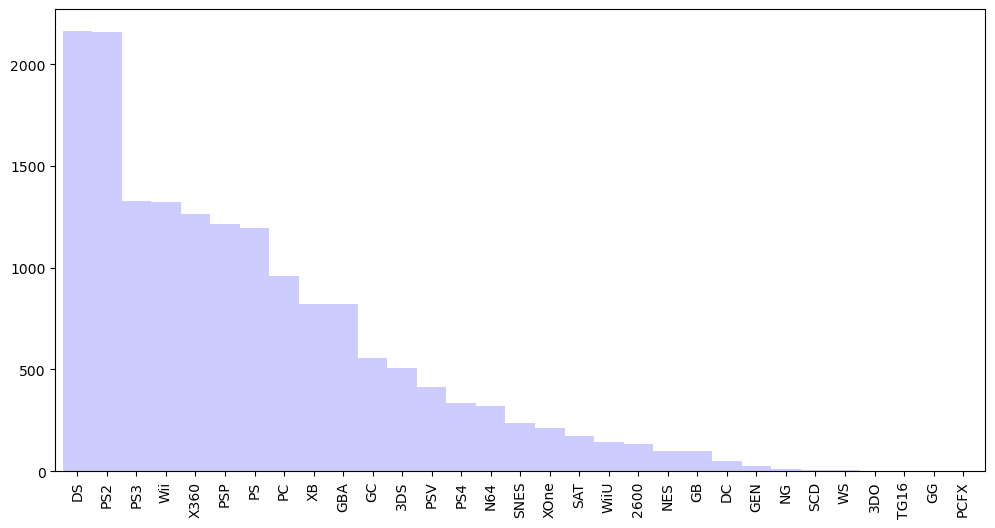

In [13]:
dist_freq_qualitativas['Frequência'].plot.bar(width= 1, color = 'blue', alpha = 0.2, figsize=(12, 6))